<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 1

### Building "Pokemon Stay"

---
You are an analyst at a "scrappy" online gaming company that specializes in remakes of last year's fads.

Your boss, who runs the product development team, is convinced that Pokemon Go's fatal flaw was that you had to actually move around outside. She has design mock-ups for a new game called Pokemon Stay: in this version players still need to move, but just from website to website. Pokemon gyms are now popular online destinations, and catching Pokemon in the "wild" simply requires browsing the internet for hours in the comfort of your home.

She wants you to program a prototype version of the game, and analyze the planned content to help the team calibrate the design.


### Package imports

The pprint package below is the only package imported here, and it's not even strictly required to do any of the project. Printing python variables and objects with pprint can help to format them in a "prettier" way.

## Answer by Nas:

## Basic Importing of packages

In [1]:
from pprint import pprint
import random

## Set the seed so that runs are reproducible

In [2]:
random.seed = 123

### We also initiate the list of player, gym locations and the Pokemon List

#### The Pokedex variable is used in the Player class and the player class assumes that all the pokemons are given within this variable. When a new pokemon list is loaded into the code, we set Pokedex = New data. So we need not edit the code of the class, via just pointing Pokedex to the new updated list e.g a pokedex, a file etc.

In [3]:
PlayerList = {} #Player List as  Dictionary
Pokedex={} #Pokemon List which we will load the list of pokemons inside. Is a Dictionary within a dictionary
Gym_locations = []

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Defining a player

---

The player variables are:

    player_id : id code unique to each player (integer)
    player_name : entered name of the player (string)
    time_played : number of time played the game in minutes (float)
    player_pokemon: the player's captured pokemon (dictionary)
    gyms_visited: ids of the gyms that a player has visited (list)
    
Create the components for a player object by defining each of these variables. The dictionary and list variables should just be defined as empty; you can use any (correctly typed) values for the others.

## Answer by Nas:

### We create a Player Class which defines an object into a player, containing the required variables and methods.
    As soon as a player is initialized, they are automatically added into the PlayerList, neat!
    Adding or removing pokemon is also through an easy function.
    Visiting gyms are also simplified to add gyms either via index or via string depending on input.
    When a player's details are updated, it will subsequently update their details in the overall PlayerList, neat!

In [4]:
class player(object): 
   
    #The required variables are created and set here to the default values. With proper data types.
    def __init__(self,player_name ,player_id):
        """The player_id can be automed within the class itself but instead I've segregated it into another function
        in case one wants a specific player_id in the future, e.g an admin wants player id = 1""" 
    
        self.player_name = str(player_name) 
        self.player_id= int(player_id) 
        self.time_played = 0.0
        self.player_pokemon = {}  
        self.gyms_visited = []
            
        #Adds this player into the player List
        global PlayerList 
        PlayerList [self.player_id] = self.player_name
    
    # Now we set some methods that player objects can perform.
    
    def info(self):
        """Returns Information about the player as a dictionary"""
        ''' Also updates the player info into the PlayerList Dictionary( for the purpose of this project)'''
        
        #Create List of Information
        PokemonTrainer = {'player_id':self.player_id, 'player_name':self.player_name, 'time_played':self.time_played,'player_pokemon': self.player_pokemon,'gyms_visited': self.gyms_visited}
        #update the PlayerList
        PlayerList.update({self.player_id:PokemonTrainer})
        return PokemonTrainer
    
    #This functions adds a pokemon into the list of pokemons the player have.
    def Pokemon(self,pokemon, pokedex = Pokedex, add=True):
        
        '''Pokemon is added via it's index number'''
        ''' By default, this will add a pokemon, add can be set to false to remove pokemon'''
        ''' The pokedex input is used to specify where the pokedex is.'''
             
        #Adds pokemon through the index 
        
        #Check whether add = true
        if add == True:
            try:
                self.player_pokemon.update({pokemon:pokedex[pokemon]})
                message = "added to"
            except:
                return 'Pokemon not recognized'    
        elif add ==False:
            try:
                self.player_pokemon.pop(pokemon)
                message = "removed from"
            except:
                return 'Pokemon not recognized'  
        else:
            print "'add' variable is not a boolean" 
            #this will prevent it from giving the output message when
            return []

        #Output messages
        #updates the PlayerList
        self.info()
        try:
            print pokedex[pokemon]['Name'], "has been",message, self.player_name + "'s", "list of pokemons" 
        except:
            print pokedex[pokemon]['name'], "has been",message, self.player_name + "'s", "list of pokemons" 
        
                         

    def VisitGym(self, gym, gym_locations=Gym_locations):
        """Player visits gym, the gym is added to the list of gyms visited"""
        ''' A gym can be added into the list more than once if it was visited numerous times'''
        
        #output message
        GymName = gym
        
        
        if type (gym) == str:
            self.gyms_visited.append(gym)
        else:
            try:
                self.gyms_visited.append(gym_locations[gym])
                GymName = gym_locations[gym]
            except:
                print str(gym) + " index is not in the Gym_locations list"
                return []
        #updates the PlayerList
        self.info()
        print str(self.player_name) + " visits the " + str(GymName) + " gym"
    
    def AddPlayTime(self, time):
        """Adds Play time into the player's stats"""
        self.time_played += time
        playtime_hours = self.time_played/3600.0
        
        #updates the PlayerList
        self.info()
        print self.player_name,"has played for",time,"seconds"
        print "Total play time is",self.time_played,"hours"
    
    
        
        

    


### A function that can help create unique random IDs.
Can help to streamline work if there were hundreds of players to be/been added. Checks whether a player ID has already been taken and finds unique one

In [5]:
def RandomID():
        #generate random number
        generating = True
        while generating == True:
            
            randomstring = random.randint(100000000,999999999)
            
        #checks whether randomstring already exists in player database
            if not randomstring in PlayerList:
                #This will exit the while loop
                generating = False
        return randomstring


### Creating a player

In [6]:
Nasrudin = player("Nasrudin Salim",RandomID())

#### Checking the variables defined for player "Nasrudin"

In [7]:
pprint (Nasrudin.info())

{'gyms_visited': [],
 'player_id': 387761444,
 'player_name': 'Nasrudin Salim',
 'player_pokemon': {},
 'time_played': 0.0}


### Checking the PlayerList
    gyms_visited should be a list
    player_id is integer.
    player_name is string.
    player_pokemon is dictionary
    time_played is float

In [8]:
pprint (PlayerList)

{387761444: {'gyms_visited': [],
             'player_id': 387761444,
             'player_name': 'Nasrudin Salim',
             'player_pokemon': {},
             'time_played': 0.0}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Defining "gym" locations

---

As the sole programmer, Pokemon Stay will have to start small. To begin, there will be 10 different gym location websites on the internet. The gym locations are:

    1. 'reddit.com'
    2. 'amazon.com'
    3. 'twitter.com'
    4. 'linkedin.com'
    5. 'ebay.com'
    6. 'netflix.com'
    7. 'sporcle.com'
    8. 'stackoverflow.com'
    9. 'github.com'
    10. 'quora.com'

1. Set up a list of all the gym locations. This will be a list of strings.
2. Append two of these locations to your player's list of visited gyms.
3. Print the list.

## Answer by Nas:

### Define the gym locations
As per what is required above

In [9]:
Gym_locations = ["reddit.com", "amazon.com", "twitter.com", "linkedin.com", "ebay.com", "netflix.com", "sporcle.com", "stackoverflow.com","github.com","quora.com"]

### Randomly appending 2 locations to player "Nasrudin"'s visited gyms
    We use the Visit Gym method in the class previously added instead of a traditional append because we've used a class to make things shorter. We should also be able to get the print out of the visits as he visits each of them.
    
    We use len(gym_locations)-1 such that we will get a random number from 0 to the length of the entire Gym_locations list. This can make the code more "dynamic" if the Gym_locations need to be adjusted ( to add or remove and site), it will adapt accordingly. The -1 is used because there is no index 10 when len will bring  =10 , as it starts from base 0

In [10]:
GymsToVisit = 2

for i in range(GymsToVisit):
    Nasrudin.VisitGym(Gym_locations[random.randint(0,len(Gym_locations)-1)])

Nasrudin Salim visits the twitter.com gym
Nasrudin Salim visits the amazon.com gym


#### Check to see if the info was updated, as well as the PlayerList

In [11]:
print "Nasrudin's Info"
pprint (Nasrudin.info())
print "..."
print "Player List"
pprint (PlayerList)

Nasrudin's Info
{'gyms_visited': ['twitter.com', 'amazon.com'],
 'player_id': 387761444,
 'player_name': 'Nasrudin Salim',
 'player_pokemon': {},
 'time_played': 0.0}
...
Player List
{387761444: {'gyms_visited': ['twitter.com', 'amazon.com'],
             'player_id': 387761444,
             'player_name': 'Nasrudin Salim',
             'player_pokemon': {},
             'time_played': 0.0}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Create a pokedex

---

We also need to create some pokemon to catch. Each pokemon will be defined by these variables:

    pokemon_id : unique identifier for each pokemon (integer)
    name : the name of the pokemon (string)
    type : the category of pokemon (string)
    hp : base hitpoints (integer)
    attack : base attack (integer)
    defense : base defense (integer)
    special_attack : base special attack (integer)
    special_defense : base sepecial defense (integer)
    speed : base speed (integer)

We are only going to create 3 different pokemon with these `pokemon_id` and `pokemon_name` values:

    1 : 'charmander'
    2 : 'squirtle'
    3 : 'bulbasaur'

Create a dictionary that will contain the pokemon. The keys of the dictionary will be the `pokemon_id` and the values will themselves dictionaries that contain the other pokemon variables. The structure of the pokedex dictionary will start like so:
     
     {
         1: {
                 'name':'charmander',
                 'type':'fire',
                 ...
                 
The `type` of charmander, squirtle, and bulbasaur should be `'fire'`, `'water'`, and `'poison'` respectively. The other values are up to you, make them anything you like!

Print (or pretty print) the pokedex dictionary with the 3 pokemon.

## Answer by Nas:

## Creating a simple "hard-coded" pokemon list
As per what the questions asks.

#### Previously, the Pokedex dictionary was already initialized at the top of this Jupyter as "Pokedex = {}"
    We will append the 3 different pokemons and their relevant stats into this pokedex.
   
 #### First create the pokemons as dictionaries

##### charmander with pokemon_id = 1, type = fire

In [12]:
charmander = {
    
                1 : {
                        'name' : 'charmander',
                        'type' : 'fire',
                        'hp' : 39,
                        'attack' : 52,
                        'defense' : 43,
                        'special_attack' : 60,
                        'special_defense' : 50,
                        'speed' : 65
                    } 
            }

##### squirtle with pokemon_id = 2, type = water

In [13]:
squirtle = {
    
                2 : {
                        'name' : 'squirtle',
                        'type' : 'water',
                        'hp' : 44,
                        'attack' : 48,
                        'defense' : 65,
                        'special_attack' : 50,
                        'special_defense' : 64,
                        'speed' : 43
                    } 
            }

##### bulbasaur with pokemon_id = 3, type = poison

In [14]:
bulbasaur = {
    
                3 : {
                        'name' : 'bulbasaur',
                        'type' : 'poison',
                        'hp' : 45,
                        'attack' : 49,
                        'defense' : 49,
                        'special_attack' : 65,
                        'special_defense' : 65,
                        'speed' : 45
                    } 
            }

### Now add these pokemons into the Pokedex
    Although I could have just hard-coded the Pokedex all in a single block containing all the pokemons instead of creating separate dictionaries and then having to update the Pokedex later, but I did it this way for easier presentation.

In [15]:
Pokedex.update(bulbasaur)
Pokedex.update(squirtle)
Pokedex.update(charmander)

### pprint the Pokedex

In [16]:
pprint (Pokedex)

{1: {'attack': 52,
     'defense': 43,
     'hp': 39,
     'name': 'charmander',
     'special_attack': 60,
     'special_defense': 50,
     'speed': 65,
     'type': 'fire'},
 2: {'attack': 48,
     'defense': 65,
     'hp': 44,
     'name': 'squirtle',
     'special_attack': 50,
     'special_defense': 64,
     'speed': 43,
     'type': 'water'},
 3: {'attack': 49,
     'defense': 49,
     'hp': 45,
     'name': 'bulbasaur',
     'special_attack': 65,
     'special_defense': 65,
     'speed': 45,
     'type': 'poison'}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Create a data structure for players

---

### 4.1 

In order to maintain a database of multiple players, create a dictionary that keeps track of players indexed by `player_id`. 

The keys of the dictionary will be `player_id` and values will be dictionaries containing each player's variables (from question 1). 

Construct the `players` dictionary and insert the player that you defined in question 1, then print `players`.

## Answer by Nas:

#### The class previously created in player 1 automatically adds players into the player dictionary, indexed by player_id
    Subsequently, the player dictionary can be updated via the update.method.

#### We can add player "Nasrudin" into players dict via update this way, 
    traditionally as what the question expects, we retrieve Nasrudin's player ID and use that as key, then the value as
    Nasrudin's dictionary then, pprint players

In [17]:
players ={}
players.update({Nasrudin.info()['player_id']:Nasrudin.info()})
pprint (players)

{387761444: {'gyms_visited': ['twitter.com', 'amazon.com'],
             'player_id': 387761444,
             'player_name': 'Nasrudin Salim',
             'player_pokemon': {},
             'time_played': 0.0}}


## Or make use of the class

#### A simpler method is to just let the class handle it, here I empty out players for demonstration purposes.
##### Then attach it to a class then pprints it to get the same result with less effort. Another bonus is that we need not have to keep updating the players dictionary each time there's a new player too.

In [18]:
players = {}
players = PlayerList
pprint (players)

{387761444: {'gyms_visited': ['twitter.com', 'amazon.com'],
             'player_id': 387761444,
             'player_name': 'Nasrudin Salim',
             'player_pokemon': {},
             'time_played': 0.0}}


---

### 4.2

Create a new player with `player_id = 2` in the `players` dictionary. Leave the `'player_pokemon'` dictionary empty. Append `'alcatraz'` and `'pacific_beach'` to the `'gyms_visited'` list for player 2.

The `'player_name'` and `'time_played'` values are up to you, but must be a string and float, respectively.

Remember, the player_id is the key for the player in the players dictionary.

Print the `players` dictionary with the new player inserted.

## Answer by Nas:

### Create new player, Gary
    player_id =2
    Visited alcatraz and pacific_beach

In [19]:
Gary = player ('Gary Strong Flavour',2) #Instaed of using the random number generator, we use 2 for the player id argument
pprint (Gary.info())

{'gyms_visited': [],
 'player_id': 2,
 'player_name': 'Gary Strong Flavour',
 'player_pokemon': {},
 'time_played': 0.0}


#### Adding Gyms visited and time_played.
        We saw that gyms_visited was empty on the last info pprint as well as time_played, so we'll use the class method
        to add those in.
        Recall that the VisitGym method can be used to either add as an index from the list of gyms we created earlier,
        Or that we can use our own custom strings such as here

In [20]:
Gary.VisitGym('alcatraz')
Gary.VisitGym('pacific_beach')
Gary.AddPlayTime(100)
# Just to prove that it works
print ""
print "Gary's Information"
pprint (Gary.info())

Gary Strong Flavour visits the alcatraz gym
Gary Strong Flavour visits the pacific_beach gym
Gary Strong Flavour has played for 100 seconds
Total play time is 100.0 hours

Gary's Information
{'gyms_visited': ['alcatraz', 'pacific_beach'],
 'player_id': 2,
 'player_name': 'Gary Strong Flavour',
 'player_pokemon': {},
 'time_played': 100.0}


### Showing off the now automatically updated players 
    Just printing it out to show that it's been updated

In [21]:
pprint (players)

{2: {'gyms_visited': ['alcatraz', 'pacific_beach'],
     'player_id': 2,
     'player_name': 'Gary Strong Flavour',
     'player_pokemon': {},
     'time_played': 100.0},
 387761444: {'gyms_visited': ['twitter.com', 'amazon.com'],
             'player_id': 387761444,
             'player_name': 'Nasrudin Salim',
             'player_pokemon': {},
             'time_played': 0.0}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Add captured pokemon for each player

---

The `'player_pokemon'` keyed dictionaries for each player keep track of which of the pokemon each player has.

The keys of the `'player_pokemon'` dictionaries are the pokemon ids that correspond to the ids in the `pokedex` dictionary you created earlier. The values are integers specifying the stats for the pokemon.

Give player 1 a squirtle. Give player 2 charmander and a bulbasaur.

Print the players dictionary after adding the pokemon for each player.


## Answer by Nas:

### Using the player class's Pokemon method 
    Give Nasrudin a squirtle, index 2
    Give Gary a Charmander and a bulbasaur, index 1 and 3

In [22]:
Nasrudin.Pokemon(2)
Gary.Pokemon(1)
Gary.Pokemon(3)

squirtle has been added to Nasrudin Salim's list of pokemons
charmander has been added to Gary Strong Flavour's list of pokemons
bulbasaur has been added to Gary Strong Flavour's list of pokemons


#### Checking out the player datastructure if its updated as well

In [23]:
pprint (players)

{2: {'gyms_visited': ['alcatraz', 'pacific_beach'],
     'player_id': 2,
     'player_name': 'Gary Strong Flavour',
     'player_pokemon': {1: {'attack': 52,
                            'defense': 43,
                            'hp': 39,
                            'name': 'charmander',
                            'special_attack': 60,
                            'special_defense': 50,
                            'speed': 65,
                            'type': 'fire'},
                        3: {'attack': 49,
                            'defense': 49,
                            'hp': 45,
                            'name': 'bulbasaur',
                            'special_attack': 65,
                            'special_defense': 65,
                            'speed': 45,
                            'type': 'poison'}},
     'time_played': 100.0},
 387761444: {'gyms_visited': ['twitter.com', 'amazon.com'],
             'player_id': 387761444,
             'player_name': 'Nasrudin



## 6. What gyms have players visited?

---
<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">
### 6.1

Write a for-loop that:

1. Iterates through the `pokemon_gyms` list of gym locations you defined before.
2. For each gym, iterate through each player in the `players` dictionary with a second, internal for-loop.
3. If the player has visited the gym, print out "[player] has visited [gym location].", filling in [player] and [gym location] with the current player's name and current gym location.

## Answer by Nas:

### Method 1: using the "Info Method in the player class"
    As well as just calling out the gyms_visited key

In [24]:
print "Gary's visited Gyms"
pprint (Gary.info()['gyms_visited'])
print "..."
print "Nasrudin's visited Gyms"
pprint (Nasrudin.info()['gyms_visited'])

Gary's visited Gyms
['alcatraz', 'pacific_beach']
...
Nasrudin's visited Gyms
['twitter.com', 'amazon.com']


### Method 2: A 'for' loop through the player list dictionary
    At first I wrote 3 for loops, but seeing that the question asks for only a secondary for loop, 
    I changed from 3 for loops into 2 by using the " if gym in {dictionary) " 
    Otherwise, 3 level for loop would have been another:
    for gymvisited in gyms_visited: --> Less efficient

In [25]:
loopcount = 0
for gym in Gym_locations:
    for player in players:
        loopcount += 1
        if gym in players[player]['gyms_visited']:
            print players[player]['player_name'],"has visited", gym
            
    

Nasrudin Salim has visited amazon.com
Nasrudin Salim has visited twitter.com


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">
### 6.2

How many times did that loop run? If you have N gyms and also N players, how many times would it run as a function of N?

Can you think of a more efficient way to accomplish the same thing? 

(You can write your answer as Markdown text.)

## Answer by Nas:

#### Amount of times the loop ran: 20

In [26]:
print loopcount

20


#### More efficient way, list comprehensions
    list comprehensions run in C and are therefore hundred times faster
    You could also just copy the visitedgyms line into the 'visitedgyms' argument in the print line to create a one-liner

In [27]:
visitedgyms = [players[player]['player_name'] + " has visited " + gym for player in players for gym in Gym_locations if gym in players[player]['gyms_visited'] ]
print ("\n".join(visitedgyms))

Nasrudin Salim has visited amazon.com
Nasrudin Salim has visited twitter.com


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Calculate player "power".

---

Define a function that will calculate a player's "power". Player power is defined as the sum of the base statistics all of their pokemon.

Your function will:

1. Accept the `players` dictionary, `pokedex` dictionary, and a player_id as arguments.
2. For the specified player_id, look up that player's pokemon and their level(s).
3. Find and aggregate the attack and defense values for each of the player's pokemon from the `pokedex` dictionary.
4. Print "[player name]'s power is [player power].", where the player power is the sum of the base statistics for all of their pokemon.
5. Return the player's power value.

Print out the pokemon power for each of your players.

## Answer by Nas:

### The definition of a pokemon's power
    Later in the function it is required to aggregate the attack and defense values of each of the player's pokemon
    Here, we will create a function to determine the power of a specific pokemon which will be used later
    The stats of interest based on this question would therefore be:
        1. Attack
        2. Defense
        3. Special_attack
        4. Special_defense
    Aggregate these stats and return the value
    
    Some obstacles, the stats have to be case insensitive to standardize things and prevent errors.
        The workaround would be to recreate the dictionary by creating 2 dummy lists that have lower cased keys. Zip it back
    And later on it no longer uses "_", so we have to set a workaround for that.

In [28]:
def PokemonPower(ID, pokedex = Pokedex):
    if ID in pokedex:
    
        #Make it case insensitive
        #Create dummy lists that has all keys standardized to lower case, zip them back into a dictionary
        #via list comprehension
        
        dummypokedexID = {key:value for key,value in zip([k.lower() for k in Pokedex[ID]],[k for k in Pokedex[ID].values()])}
        
        try:
    
            AggregatePower = dummypokedexID['attack'] + dummypokedexID['defense'] + dummypokedexID['special_attack'] + dummypokedexID['special_defense']
        except:
        #error fix in the case it starts using no underscores for the special stats later on.
            AggregatePower = dummypokedexID['attack'] + dummypokedexID['defense'] + dummypokedexID['specialattack'] + dummypokedexID['specialdefense']
        return AggregatePower
    else:
        print ID, "pokemon not in Pokedex"
        return []
        

## Creating the Player Power Calculator function
### Give some default values to make using the function easier
    player dict --> players
    pokedex dict --> Pokedex
#### Error check for existence of player
else, return nothing and print an error
#### Making use of the PokemonPower function
Run a simple For loop to sum all the player's owned pokemon's powers

    Print the statement
    Return the sum
    

In [29]:
def PlayerPower(player_id, player_datastructure = players,pokedex_dict = Pokedex ):
    
    if player_id in player_datastructure:
        
        #A for loop to sum all the pokemon's powers
        
        player_power = 0 #initiate the variable
        for pokemon in player_datastructure[player_id]['player_pokemon']:
            
            #calls the Pokemon Power function and then adds the return value into player_power
            player_power += PokemonPower(pokemon,pokedex_dict)
              
        print str(player_datastructure[player_id]['player_name']) + "'s power is", str(player_power)+"."
        #returns the final value
        return player_power
        
    else:
        print "player",player_id, "does not exist!"
        return []
    

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Load a pokedex file containing all the pokemon

---

### 8.1

While you were putting together the prototype code, your colleagues were preparing a dataset of Pokemon and their attributes. (This was a rush job, so they may have picked some crazy values for some...)

The code below loads information from a comma separated value (csv) file. You need to parse this string into a more useable format. The format of the string is:

- Rows are separated by newline characters: \n
- Columns are separated by commas: ,
- All cells in the csv are double quoted. Ex: "PokedexNumber" is the first cell of the first row.


Using for-loops, create a list of lists where each list within the overall list is a row of the csv/matrix, and each element in that list is a cell in that row. Additional criteria:

1. Quotes are removed from each cell item.
2. Numeric column values are converted to floats.
3. There are some cells that are empty and have no information. For these cells put a -1 value in place.

Your end result is effectively a matrix. Each list in the outer list is a row, and the *j*th elements of list together form the *j*th column, which represents a data attribute. The first three lists in your pokedex list should look like this:

    ['PokedexNumber', 'Name', 'Type', 'Total', 'HP', 'Attack', 'Defense', 'SpecialAttack', 'SpecialDefense', 'Speed']
    [1.0, 'Bulbasaur', 'GrassPoison', 318.0, 45.0, 49.0, 49.0, 65.0, 65.0, 45.0]
    [2.0, 'Ivysaur', 'GrassPoison', 405.0, 60.0, 62.0, 63.0, 80.0, 80.0, 60.0]

## Provided code by Jupyter exercise

In [30]:
# Code to read in pokedex info
raw_pd = ''
pokedex_file = 'pokedex_basic.csv'
with open(pokedex_file, 'r') as f:
    raw_pd = f.read()
    
# the pokedex string is assigned to the raw_pd variable

## Answer by Nas:

### Task was to work on the above code to make it usable
     Split the string into individual rows
     fix empty cells

In [31]:
new_pd = raw_pd.split("\n")


### Using for loops, create a list of lists with proper elements based on the commas
    Convert numeric values to floats
    append the new elements into a list
    append that list into the list of lists

In [32]:
fixed_pd =[]
for rows in new_pd:
    
    rows = rows.replace('"',"")
    #split the row
    rows = rows.split(",")
    
    NewRow =[]
    for element in rows:
        #convert numeric values in cells into float
        try:
            element = float(element)
        except:
            element = element
        #Make this a new row consisting of elements
        NewRow.append(element)
    #append this new row into the list of lists, fixed_pd
    fixed_pd.append(NewRow)


### pprint the fixed_pd
Received just as the question asks

In [33]:
pprint (fixed_pd)

[['PokedexNumber',
  'Name',
  'Type',
  'Total',
  'HP',
  'Attack',
  'Defense',
  'SpecialAttack',
  'SpecialDefense',
  'Speed'],
 [1.0, 'Bulbasaur', 'GrassPoison', 318.0, 45.0, 49.0, 49.0, 65.0, 65.0, 45.0],
 [2.0, 'Ivysaur', 'GrassPoison', 405.0, 60.0, 62.0, 63.0, 80.0, 80.0, 60.0],
 [3.0, 'Venusaur', 'GrassPoison', 525.0, 80.0, 82.0, 83.0, 100.0, 100.0, 80.0],
 [3.0,
  'VenusaurMega Venusaur',
  'GrassPoison',
  625.0,
  80.0,
  100.0,
  123.0,
  122.0,
  120.0,
  80.0],
 [4.0, 'Charmander', 'Fire', 309.0, 39.0, 52.0, 43.0, 60.0, 50.0, 65.0],
 [5.0, 'Charmeleon', 'Fire', 405.0, 58.0, 64.0, 58.0, 80.0, 65.0, 80.0],
 [6.0, 'Charizard', 'FireFlying', 534.0, 78.0, 84.0, 78.0, 109.0, 85.0, 100.0],
 [6.0,
  'CharizardMega Charizard X',
  'FireDragon',
  634.0,
  78.0,
  130.0,
  111.0,
  130.0,
  85.0,
  100.0],
 [6.0,
  'CharizardMega Charizard Y',
  'FireFlying',
  634.0,
  78.0,
  104.0,
  78.0,
  159.0,
  115.0,
  100.0],
 [7.0, 'Squirtle', 'Water', 314.0, 44.0, 48.0, 65.0, 50.0, 

  65.0,
  155.0,
  120.0,
  65.0,
  90.0,
  105.0],
 [128.0, 'Tauros', 'Normal', 490.0, 75.0, 100.0, 95.0, 40.0, 70.0, 110.0],
 [129.0, 'Magikarp', 'Water', 200.0, 20.0, 10.0, 55.0, 15.0, 20.0, 80.0],
 [130.0,
  'Gyarados',
  'WaterFlying',
  540.0,
  95.0,
  125.0,
  79.0,
  60.0,
  100.0,
  81.0],
 [130.0,
  'GyaradosMega Gyarados',
  'WaterDark',
  640.0,
  95.0,
  155.0,
  109.0,
  70.0,
  130.0,
  81.0],
 [131.0, 'Lapras', 'WaterIce', 535.0, 130.0, 85.0, 80.0, 85.0, 95.0, 60.0],
 [132.0, 'Ditto', 'Normal', 288.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0],
 [133.0, 'Eevee', 'Normal', 325.0, 55.0, 55.0, 50.0, 45.0, 65.0, 55.0],
 [134.0, 'Vaporeon', 'Water', 525.0, 130.0, 65.0, 60.0, 110.0, 95.0, 65.0],
 [135.0, 'Jolteon', 'Electric', 525.0, 65.0, 65.0, 60.0, 110.0, 95.0, 130.0],
 [136.0, 'Flareon', 'Fire', 525.0, 65.0, 130.0, 60.0, 95.0, 110.0, 65.0],
 [137.0, 'Porygon', 'Normal', 395.0, 65.0, 60.0, 70.0, 85.0, 75.0, 40.0],
 [138.0, 'Omanyte', 'RockWater', 355.0, 35.0, 40.0, 100.0, 90.0, 

  'Piloswine',
  'IceGround',
  450.0,
  100.0,
  100.0,
  80.0,
  60.0,
  60.0,
  50.0],
 [222.0, 'Corsola', 'WaterRock', 380.0, 55.0, 55.0, 85.0, 65.0, 85.0, 35.0],
 [223.0, 'Remoraid', 'Water', 300.0, 35.0, 65.0, 35.0, 65.0, 35.0, 65.0],
 [224.0, 'Octillery', 'Water', 480.0, 75.0, 105.0, 75.0, 105.0, 75.0, 45.0],
 [225.0, 'Delibird', 'IceFlying', 330.0, 45.0, 55.0, 45.0, 65.0, 45.0, 75.0],
 [226.0, 'Mantine', 'WaterFlying', 465.0, 65.0, 40.0, 70.0, 80.0, 140.0, 70.0],
 [227.0,
  'Skarmory',
  'SteelFlying',
  465.0,
  65.0,
  80.0,
  140.0,
  40.0,
  70.0,
  70.0],
 [228.0, 'Houndour', 'DarkFire', 330.0, 45.0, 60.0, 30.0, 80.0, 50.0, 65.0],
 [229.0, 'Houndoom', 'DarkFire', 500.0, 75.0, 90.0, 50.0, 110.0, 80.0, 95.0],
 [229.0,
  'HoundoomMega Houndoom',
  'DarkFire',
  600.0,
  75.0,
  90.0,
  90.0,
  140.0,
  90.0,
  115.0],
 [230.0, 'Kingdra', 'WaterDragon', 540.0, 75.0, 95.0, 95.0, 95.0, 95.0, 85.0],
 [231.0, 'Phanpy', 'Ground', 330.0, 90.0, 60.0, 60.0, 40.0, 40.0, 40.0],
 [232.0,

 [316.0, 'Gulpin', 'Poison', 302.0, 70.0, 43.0, 53.0, 43.0, 53.0, 40.0],
 [317.0, 'Swalot', 'Poison', 467.0, 100.0, 73.0, 83.0, 73.0, 83.0, 55.0],
 [318.0, 'Carvanha', 'WaterDark', 305.0, 45.0, 90.0, 20.0, 65.0, 20.0, 65.0],
 [319.0, 'Sharpedo', 'WaterDark', 460.0, 70.0, 120.0, 40.0, 95.0, 40.0, 95.0],
 [319.0,
  'SharpedoMega Sharpedo',
  'WaterDark',
  560.0,
  70.0,
  140.0,
  70.0,
  110.0,
  65.0,
  105.0],
 [320.0, 'Wailmer', 'Water', 400.0, 130.0, 70.0, 35.0, 70.0, 35.0, 60.0],
 [321.0, 'Wailord', 'Water', 500.0, 170.0, 90.0, 45.0, 90.0, 45.0, 60.0],
 [322.0, 'Numel', 'FireGround', 305.0, 60.0, 60.0, 40.0, 65.0, 45.0, 35.0],
 [323.0,
  'Camerupt',
  'FireGround',
  460.0,
  70.0,
  100.0,
  70.0,
  105.0,
  75.0,
  40.0],
 [323.0,
  'CameruptMega Camerupt',
  'FireGround',
  560.0,
  70.0,
  120.0,
  100.0,
  145.0,
  105.0,
  20.0],
 [324.0, 'Torkoal', 'Fire', 470.0, 70.0, 85.0, 140.0, 85.0, 70.0, 20.0],
 [325.0, 'Spoink', 'Psychic', 330.0, 60.0, 25.0, 35.0, 70.0, 80.0, 60.0],


  'DarkFlying',
  505.0,
  100.0,
  125.0,
  52.0,
  105.0,
  52.0,
  71.0],
 [431.0, 'Glameow', 'Normal', 310.0, 49.0, 55.0, 42.0, 42.0, 37.0, 85.0],
 [432.0, 'Purugly', 'Normal', 452.0, 71.0, 82.0, 64.0, 64.0, 59.0, 112.0],
 [433.0, 'Chingling', 'Psychic', 285.0, 45.0, 30.0, 50.0, 65.0, 50.0, 45.0],
 [434.0, 'Stunky', 'PoisonDark', 329.0, 63.0, 63.0, 47.0, 41.0, 41.0, 74.0],
 [435.0, 'Skuntank', 'PoisonDark', 479.0, 103.0, 93.0, 67.0, 71.0, 61.0, 84.0],
 [436.0, 'Bronzor', 'SteelPsychic', 300.0, 57.0, 24.0, 86.0, 24.0, 86.0, 23.0],
 [437.0,
  'Bronzong',
  'SteelPsychic',
  500.0,
  67.0,
  89.0,
  116.0,
  79.0,
  116.0,
  33.0],
 [438.0, 'Bonsly', 'Rock', 290.0, 50.0, 80.0, 95.0, 10.0, 45.0, 10.0],
 [439.0,
  'Mime Jr.',
  'PsychicFairy',
  310.0,
  20.0,
  25.0,
  45.0,
  70.0,
  90.0,
  60.0],
 [440.0, 'Happiny', 'Normal', 220.0, 100.0, 5.0, 5.0, 15.0, 65.0, 30.0],
 [441.0, 'Chatot', 'NormalFlying', 411.0, 76.0, 65.0, 45.0, 92.0, 42.0, 91.0],
 [442.0,
  'Spiritomb',
  'GhostDark'

  140.0,
  55.0,
  30.0,
  55.0,
  95.0],
 [555.0,
  'DarmanitanZen Mode',
  'FirePsychic',
  540.0,
  105.0,
  30.0,
  105.0,
  140.0,
  105.0,
  55.0],
 [556.0, 'Maractus', 'Grass', 461.0, 75.0, 86.0, 67.0, 106.0, 67.0, 60.0],
 [557.0, 'Dwebble', 'BugRock', 325.0, 50.0, 65.0, 85.0, 35.0, 35.0, 55.0],
 [558.0, 'Crustle', 'BugRock', 475.0, 70.0, 95.0, 125.0, 65.0, 75.0, 45.0],
 [559.0, 'Scraggy', 'DarkFighting', 348.0, 50.0, 75.0, 70.0, 35.0, 70.0, 48.0],
 [560.0,
  'Scrafty',
  'DarkFighting',
  488.0,
  65.0,
  90.0,
  115.0,
  45.0,
  115.0,
  58.0],
 [561.0,
  'Sigilyph',
  'PsychicFlying',
  490.0,
  72.0,
  58.0,
  80.0,
  103.0,
  80.0,
  97.0],
 [562.0, 'Yamask', 'Ghost', 303.0, 38.0, 30.0, 85.0, 55.0, 65.0, 30.0],
 [563.0, 'Cofagrigus', 'Ghost', 483.0, 58.0, 50.0, 145.0, 95.0, 105.0, 30.0],
 [564.0, 'Tirtouga', 'WaterRock', 355.0, 54.0, 78.0, 103.0, 53.0, 45.0, 22.0],
 [565.0,
  'Carracosta',
  'WaterRock',
  495.0,
  74.0,
  108.0,
  133.0,
  83.0,
  65.0,
  32.0],
 [566.0, '

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 8.2 Parse the raw pokedex with list comprehensions

---

Perform the same parsing as above, but **using only a single list comprehension** instead of for loops. You may have nested list comprehensions within the main list comprehension! The output should be exactly the same.

## Answer by Nas:

##  Via list comprehensions

    Extract the cleaned and split-ted rows with a replaced '"' turned into nothing in the 
    splitted and fixed(for empty values) raw_pd
    Then map a function over each element in the extracted Lists within the cleaned rows To convert them into float

In [34]:
pd_comp = [map(lambda x: float(x) if x.isdigit() else x, List) for List in [row.replace('"',"").split(",") for row in raw_pd.replace(",,", ",-1,").split("\n") ]]

#### Proof

In [35]:
pprint (pd_comp)

[['PokedexNumber',
  'Name',
  'Type',
  'Total',
  'HP',
  'Attack',
  'Defense',
  'SpecialAttack',
  'SpecialDefense',
  'Speed'],
 [1.0, 'Bulbasaur', 'GrassPoison', 318.0, 45.0, 49.0, 49.0, 65.0, 65.0, 45.0],
 [2.0, 'Ivysaur', 'GrassPoison', 405.0, 60.0, 62.0, 63.0, 80.0, 80.0, 60.0],
 [3.0, 'Venusaur', 'GrassPoison', 525.0, 80.0, 82.0, 83.0, 100.0, 100.0, 80.0],
 [3.0,
  'VenusaurMega Venusaur',
  'GrassPoison',
  625.0,
  80.0,
  100.0,
  123.0,
  122.0,
  120.0,
  80.0],
 [4.0, 'Charmander', 'Fire', 309.0, 39.0, 52.0, 43.0, 60.0, 50.0, 65.0],
 [5.0, 'Charmeleon', 'Fire', 405.0, 58.0, 64.0, 58.0, 80.0, 65.0, 80.0],
 [6.0, 'Charizard', 'FireFlying', 534.0, 78.0, 84.0, 78.0, 109.0, 85.0, 100.0],
 [6.0,
  'CharizardMega Charizard X',
  'FireDragon',
  634.0,
  78.0,
  130.0,
  111.0,
  130.0,
  85.0,
  100.0],
 [6.0,
  'CharizardMega Charizard Y',
  'FireFlying',
  634.0,
  78.0,
  104.0,
  78.0,
  159.0,
  115.0,
  100.0],
 [7.0, 'Squirtle', 'Water', 314.0, 44.0, 48.0, 65.0, 50.0, 

  130.0,
  81.0],
 [131.0, 'Lapras', 'WaterIce', 535.0, 130.0, 85.0, 80.0, 85.0, 95.0, 60.0],
 [132.0, 'Ditto', 'Normal', 288.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0],
 [133.0, 'Eevee', 'Normal', 325.0, 55.0, 55.0, 50.0, 45.0, 65.0, 55.0],
 [134.0, 'Vaporeon', 'Water', 525.0, 130.0, 65.0, 60.0, 110.0, 95.0, 65.0],
 [135.0, 'Jolteon', 'Electric', 525.0, 65.0, 65.0, 60.0, 110.0, 95.0, 130.0],
 [136.0, 'Flareon', 'Fire', 525.0, 65.0, 130.0, 60.0, 95.0, 110.0, 65.0],
 [137.0, 'Porygon', 'Normal', 395.0, 65.0, 60.0, 70.0, 85.0, 75.0, 40.0],
 [138.0, 'Omanyte', 'RockWater', 355.0, 35.0, 40.0, 100.0, 90.0, 55.0, 35.0],
 [139.0, 'Omastar', 'RockWater', 495.0, 70.0, 60.0, 125.0, 115.0, 70.0, 55.0],
 [140.0, 'Kabuto', 'RockWater', 355.0, 30.0, 80.0, 90.0, 55.0, 45.0, 55.0],
 [141.0, 'Kabutops', 'RockWater', 495.0, 60.0, 115.0, 105.0, 65.0, 70.0, 80.0],
 [142.0,
  'Aerodactyl',
  'RockFlying',
  515.0,
  80.0,
  105.0,
  65.0,
  60.0,
  75.0,
  130.0],
 [142.0,
  'AerodactylMega Aerodactyl',
  'Roc

 [237.0, 'Hitmontop', 'Fighting', 455.0, 50.0, 95.0, 95.0, 35.0, 110.0, 70.0],
 [238.0, 'Smoochum', 'IcePsychic', 305.0, 45.0, 30.0, 15.0, 85.0, 65.0, 65.0],
 [239.0, 'Elekid', 'Electric', 360.0, 45.0, 63.0, 37.0, 65.0, 55.0, 95.0],
 [240.0, 'Magby', 'Fire', 365.0, 45.0, 75.0, 37.0, 70.0, 55.0, 83.0],
 [241.0, 'Miltank', 'Normal', 490.0, 95.0, 80.0, 105.0, 40.0, 70.0, 100.0],
 [242.0, 'Blissey', 'Normal', 540.0, 255.0, 10.0, 10.0, 75.0, 135.0, 55.0],
 [243.0, 'Raikou', 'Electric', 580.0, 90.0, 85.0, 75.0, 115.0, 100.0, 115.0],
 [244.0, 'Entei', 'Fire', 580.0, 115.0, 115.0, 85.0, 90.0, 75.0, 100.0],
 [245.0, 'Suicune', 'Water', 580.0, 100.0, 75.0, 115.0, 90.0, 115.0, 85.0],
 [246.0, 'Larvitar', 'RockGround', 300.0, 50.0, 64.0, 50.0, 45.0, 50.0, 41.0],
 [247.0, 'Pupitar', 'RockGround', 410.0, 70.0, 84.0, 70.0, 65.0, 70.0, 51.0],
 [248.0,
  'Tyranitar',
  'RockDark',
  600.0,
  100.0,
  134.0,
  110.0,
  95.0,
  100.0,
  61.0],
 [248.0,
  'TyranitarMega Tyranitar',
  'RockDark',
  700.0,


 [390.0, 'Chimchar', 'Fire', 309.0, 44.0, 58.0, 44.0, 58.0, 44.0, 61.0],
 [391.0,
  'Monferno',
  'FireFighting',
  405.0,
  64.0,
  78.0,
  52.0,
  78.0,
  52.0,
  81.0],
 [392.0,
  'Infernape',
  'FireFighting',
  534.0,
  76.0,
  104.0,
  71.0,
  104.0,
  71.0,
  108.0],
 [393.0, 'Piplup', 'Water', 314.0, 53.0, 51.0, 53.0, 61.0, 56.0, 40.0],
 [394.0, 'Prinplup', 'Water', 405.0, 64.0, 66.0, 68.0, 81.0, 76.0, 50.0],
 [395.0,
  'Empoleon',
  'WaterSteel',
  530.0,
  84.0,
  86.0,
  88.0,
  111.0,
  101.0,
  60.0],
 [396.0, 'Starly', 'NormalFlying', 245.0, 40.0, 55.0, 30.0, 30.0, 30.0, 60.0],
 [397.0,
  'Staravia',
  'NormalFlying',
  340.0,
  55.0,
  75.0,
  50.0,
  40.0,
  40.0,
  80.0],
 [398.0,
  'Staraptor',
  'NormalFlying',
  485.0,
  85.0,
  120.0,
  70.0,
  50.0,
  60.0,
  100.0],
 [399.0, 'Bidoof', 'Normal', 250.0, 59.0, 45.0, 40.0, 35.0, 40.0, 31.0],
 [400.0, 'Bibarel', 'NormalWater', 410.0, 79.0, 85.0, 60.0, 55.0, 60.0, 71.0],
 [401.0, 'Kricketot', 'Bug', 194.0, 37.0, 25.0, 

 [559.0, 'Scraggy', 'DarkFighting', 348.0, 50.0, 75.0, 70.0, 35.0, 70.0, 48.0],
 [560.0,
  'Scrafty',
  'DarkFighting',
  488.0,
  65.0,
  90.0,
  115.0,
  45.0,
  115.0,
  58.0],
 [561.0,
  'Sigilyph',
  'PsychicFlying',
  490.0,
  72.0,
  58.0,
  80.0,
  103.0,
  80.0,
  97.0],
 [562.0, 'Yamask', 'Ghost', 303.0, 38.0, 30.0, 85.0, 55.0, 65.0, 30.0],
 [563.0, 'Cofagrigus', 'Ghost', 483.0, 58.0, 50.0, 145.0, 95.0, 105.0, 30.0],
 [564.0, 'Tirtouga', 'WaterRock', 355.0, 54.0, 78.0, 103.0, 53.0, 45.0, 22.0],
 [565.0,
  'Carracosta',
  'WaterRock',
  495.0,
  74.0,
  108.0,
  133.0,
  83.0,
  65.0,
  32.0],
 [566.0, 'Archen', 'RockFlying', 401.0, 55.0, 112.0, 45.0, 74.0, 45.0, 70.0],
 [567.0,
  'Archeops',
  'RockFlying',
  567.0,
  75.0,
  140.0,
  65.0,
  112.0,
  65.0,
  110.0],
 [568.0, 'Trubbish', 'Poison', 329.0, 50.0, 50.0, 62.0, 40.0, 62.0, 65.0],
 [569.0, 'Garbodor', 'Poison', 474.0, 80.0, 95.0, 82.0, 60.0, 82.0, 75.0],
 [570.0, 'Zorua', 'Dark', 330.0, 40.0, 65.0, 40.0, 80.0, 40.0,

  80.0,
  160.0,
  60.0,
  170.0,
  130.0,
  80.0],
 [721.0,
  'Volcanion',
  'FireWater',
  600.0,
  80.0,
  110.0,
  120.0,
  130.0,
  90.0,
  70.0]]


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Write a function to generate the full pokedex

---

Write a function that recreates the pokedex you made before, but with the data read in from the full pokemon file. The `PokedexNumber` should be used as the `pokemon_id` key values for the dictionary of pokemon.

Your function should:

1. Take the parsed pokedex information you created above as an argument.
2. Return a dictionary in the same format as your original pokedex you created before containing the information from the parsed full pokedex file.

To test the function, print out the pokemon with id = 100.

## Answer by Nas:

## Converting the parsed pokedex format into the PokeDex dict format template

#### The pokedex has to be in a format where the key = pokemon pokedex ID whereas the values call for the pokemon Information. However, the pokemon information should be in dictionaries e.g [ name:bulbasaur, type: GrassPoison]
There's a problem here as the labels are in their own separate row and the information are all segregated in their own respective individual rows.
    To form the outcome required, we have to make a new array for the primary dictionary key, where the keys are all the pokemon indexes. Then for each pokemon information value e.g GrassPoison, Bulbasaur, etc. We have to pair that with the proper key i.e the label. Such that it becomes Name: bulbasaur, type: GrassPoison, Total:318. This dictionary will be in a list which is then zipped into the dictionary with key:value being Pokemon index : Pokemon Info dict list

### Working with a function to handle the processing
    I noticed that some PokedexNumber have duplicates as these are the variants of the same pokemon. For example Pokedex
    Pokedex Number 6. Charizard and MegaCharizard X and Y.
    A work-around would probably to have the value split into a another dictionary, so it will be 3 levels of dictionaries.

In [36]:
def PokedictGenerator(parsedpd=pd_comp):
    
    #The labels
    label = parsedpd[0][1::]
    #remove the PokedexNumber labe with slicing
    
    
    #The Data
    data = parsedpd[1::]
    
    #The main dictionary is initialized here
    Pokedexdict = {}
    
    #The original Pokedex values do not contain the PokeDexNumber as a constituent of the values.
    # We will have to pop it out and use it as the key.
    for pokemoninfo in data:
        
        #This is the dictionary to contain the pokemon stats
        Pokemondict = { }
        PokemonVariants = {}
        #Get the Pokedex Number 
        PokeNumber = pokemoninfo[0]
        
        #We now zip the data with the labels to create the dictionary
        Pokemondict.update( {key:value for key,value in zip(label,pokemoninfo[1::])})
        
        #since there are different pokemons with the same PokedexNumber, we will have to create another layer
        variant =1 #this will work as a sub-Pokemon ID
        #check if the pokemon has a variant
        if PokeNumber in Pokedexdict:
            
            #Variants of this pokemon exists
            while variant in Pokedexdict[PokeNumber]: #Variant already registered, so we increase the sub-index number by 1
                
                variant += 1
            Pokedexdict[PokeNumber][variant] = Pokemondict
            
        
            #We then add this dictionary of dictionaries into the PokedexDict
        else:
            PokemonVariants[variant] = Pokemondict
            Pokedexdict.update({PokeNumber:PokemonVariants})
        
    #returns the finished dictionary
    return Pokedexdict
        
    

#### proof by printing full dictionary


In [37]:
pprint (PokedictGenerator())

{1.0: {1: {'Attack': 49.0,
           'Defense': 49.0,
           'HP': 45.0,
           'Name': 'Bulbasaur',
           'SpecialAttack': 65.0,
           'SpecialDefense': 65.0,
           'Speed': 45.0,
           'Total': 318.0,
           'Type': 'GrassPoison'}},
 2.0: {1: {'Attack': 62.0,
           'Defense': 63.0,
           'HP': 60.0,
           'Name': 'Ivysaur',
           'SpecialAttack': 80.0,
           'SpecialDefense': 80.0,
           'Speed': 60.0,
           'Total': 405.0,
           'Type': 'GrassPoison'}},
 3.0: {1: {'Attack': 82.0,
           'Defense': 83.0,
           'HP': 80.0,
           'Name': 'Venusaur',
           'SpecialAttack': 100.0,
           'SpecialDefense': 100.0,
           'Speed': 80.0,
           'Total': 525.0,
           'Type': 'GrassPoison'},
       2: {'Attack': 100.0,
           'Defense': 123.0,
           'HP': 80.0,
           'Name': 'VenusaurMega Venusaur',
           'SpecialAttack': 122.0,
           'SpecialDefense': 120.0,
   

            'Defense': 50.0,
            'HP': 35.0,
            'Name': 'Dugtrio',
            'SpecialAttack': 50.0,
            'SpecialDefense': 70.0,
            'Speed': 120.0,
            'Total': 405.0,
            'Type': 'Ground'}},
 52.0: {1: {'Attack': 45.0,
            'Defense': 35.0,
            'HP': 40.0,
            'Name': 'Meowth',
            'SpecialAttack': 40.0,
            'SpecialDefense': 40.0,
            'Speed': 90.0,
            'Total': 290.0,
            'Type': 'Normal'}},
 53.0: {1: {'Attack': 70.0,
            'Defense': 60.0,
            'HP': 65.0,
            'Name': 'Persian',
            'SpecialAttack': 65.0,
            'SpecialDefense': 65.0,
            'Speed': 115.0,
            'Total': 440.0,
            'Type': 'Normal'}},
 54.0: {1: {'Attack': 52.0,
            'Defense': 48.0,
            'HP': 50.0,
            'Name': 'Psyduck',
            'SpecialAttack': 65.0,
            'SpecialDefense': 50.0,
            'Speed': 55.0,
       

             'SpecialAttack': 95.0,
             'SpecialDefense': 70.0,
             'Speed': 95.0,
             'Total': 470.0,
             'Type': 'PsychicFlying'}},
 179.0: {1: {'Attack': 40.0,
             'Defense': 40.0,
             'HP': 55.0,
             'Name': 'Mareep',
             'SpecialAttack': 65.0,
             'SpecialDefense': 45.0,
             'Speed': 35.0,
             'Total': 280.0,
             'Type': 'Electric'}},
 180.0: {1: {'Attack': 55.0,
             'Defense': 55.0,
             'HP': 70.0,
             'Name': 'Flaaffy',
             'SpecialAttack': 80.0,
             'SpecialDefense': 60.0,
             'Speed': 45.0,
             'Total': 365.0,
             'Type': 'Electric'}},
 181.0: {1: {'Attack': 75.0,
             'Defense': 85.0,
             'HP': 90.0,
             'Name': 'Ampharos',
             'SpecialAttack': 115.0,
             'SpecialDefense': 90.0,
             'Speed': 55.0,
             'Total': 510.0,
             'Type': 

 315.0: {1: {'Attack': 60.0,
             'Defense': 45.0,
             'HP': 50.0,
             'Name': 'Roselia',
             'SpecialAttack': 100.0,
             'SpecialDefense': 80.0,
             'Speed': 65.0,
             'Total': 400.0,
             'Type': 'GrassPoison'}},
 316.0: {1: {'Attack': 43.0,
             'Defense': 53.0,
             'HP': 70.0,
             'Name': 'Gulpin',
             'SpecialAttack': 43.0,
             'SpecialDefense': 53.0,
             'Speed': 40.0,
             'Total': 302.0,
             'Type': 'Poison'}},
 317.0: {1: {'Attack': 73.0,
             'Defense': 83.0,
             'HP': 100.0,
             'Name': 'Swalot',
             'SpecialAttack': 73.0,
             'SpecialDefense': 83.0,
             'Speed': 55.0,
             'Total': 467.0,
             'Type': 'Poison'}},
 318.0: {1: {'Attack': 90.0,
             'Defense': 20.0,
             'HP': 45.0,
             'Name': 'Carvanha',
             'SpecialAttack': 65.0,
     

             'Speed': 35.0,
             'Total': 275.0,
             'Type': 'Grass'}},
 421.0: {1: {'Attack': 60.0,
             'Defense': 70.0,
             'HP': 70.0,
             'Name': 'Cherrim',
             'SpecialAttack': 87.0,
             'SpecialDefense': 78.0,
             'Speed': 85.0,
             'Total': 450.0,
             'Type': 'Grass'}},
 422.0: {1: {'Attack': 48.0,
             'Defense': 48.0,
             'HP': 76.0,
             'Name': 'Shellos',
             'SpecialAttack': 57.0,
             'SpecialDefense': 62.0,
             'Speed': 34.0,
             'Total': 325.0,
             'Type': 'Water'}},
 423.0: {1: {'Attack': 83.0,
             'Defense': 68.0,
             'HP': 111.0,
             'Name': 'Gastrodon',
             'SpecialAttack': 92.0,
             'SpecialDefense': 82.0,
             'Speed': 39.0,
             'Total': 475.0,
             'Type': 'WaterGround'}},
 424.0: {1: {'Attack': 100.0,
             'Defense': 66.0,
        

 547.0: {1: {'Attack': 67.0,
             'Defense': 85.0,
             'HP': 60.0,
             'Name': 'Whimsicott',
             'SpecialAttack': 77.0,
             'SpecialDefense': 75.0,
             'Speed': 116.0,
             'Total': 480.0,
             'Type': 'GrassFairy'}},
 548.0: {1: {'Attack': 35.0,
             'Defense': 50.0,
             'HP': 45.0,
             'Name': 'Petilil',
             'SpecialAttack': 70.0,
             'SpecialDefense': 50.0,
             'Speed': 30.0,
             'Total': 280.0,
             'Type': 'Grass'}},
 549.0: {1: {'Attack': 60.0,
             'Defense': 75.0,
             'HP': 70.0,
             'Name': 'Lilligant',
             'SpecialAttack': 110.0,
             'SpecialDefense': 75.0,
             'Speed': 90.0,
             'Total': 480.0,
             'Type': 'Grass'}},
 550.0: {1: {'Attack': 92.0,
             'Defense': 65.0,
             'HP': 70.0,
             'Name': 'Basculin',
             'SpecialAttack': 80.0,
 

             'Speed': 128.0,
             'Total': 600.0,
             'Type': 'NormalFighting'}},
 649.0: {1: {'Attack': 120.0,
             'Defense': 95.0,
             'HP': 71.0,
             'Name': 'Genesect',
             'SpecialAttack': 120.0,
             'SpecialDefense': 95.0,
             'Speed': 99.0,
             'Total': 600.0,
             'Type': 'BugSteel'}},
 650.0: {1: {'Attack': 61.0,
             'Defense': 65.0,
             'HP': 56.0,
             'Name': 'Chespin',
             'SpecialAttack': 48.0,
             'SpecialDefense': 45.0,
             'Speed': 38.0,
             'Total': 313.0,
             'Type': 'Grass'}},
 651.0: {1: {'Attack': 78.0,
             'Defense': 95.0,
             'HP': 61.0,
             'Name': 'Quilladin',
             'SpecialAttack': 56.0,
             'SpecialDefense': 58.0,
             'Speed': 57.0,
             'Total': 405.0,
             'Type': 'Grass'}},
 652.0: {1: {'Attack': 107.0,
             'Defense': 122.0

### Print a pokemon that has a variant, Charlizard, 6.

In [38]:
pprint (PokedictGenerator()[6])

{1: {'Attack': 84.0,
     'Defense': 78.0,
     'HP': 78.0,
     'Name': 'Charizard',
     'SpecialAttack': 109.0,
     'SpecialDefense': 85.0,
     'Speed': 100.0,
     'Total': 534.0,
     'Type': 'FireFlying'},
 2: {'Attack': 130.0,
     'Defense': 111.0,
     'HP': 78.0,
     'Name': 'CharizardMega Charizard X',
     'SpecialAttack': 130.0,
     'SpecialDefense': 85.0,
     'Speed': 100.0,
     'Total': 634.0,
     'Type': 'FireDragon'},
 3: {'Attack': 104.0,
     'Defense': 78.0,
     'HP': 78.0,
     'Name': 'CharizardMega Charizard Y',
     'SpecialAttack': 159.0,
     'SpecialDefense': 115.0,
     'Speed': 100.0,
     'Total': 634.0,
     'Type': 'FireFlying'}}


<img src="http://i.imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Write a function to generate a "filtered" pokedex
---
Your function should:
1. Take the parsed pokedex information you created above as an argument.
1. Take a dictionary as a parameter with keys matching the features of the Pokedex, filtering by exact match for string type values, and/or filter continuous variables specified value that is greater than or equal to the dictionary key parameter.
1. Return multiple elements from the Pokedex

Example:

```python

# Only filter based on parameters passed
filter_options = {
    'Attack':   25,
    'Defense':  30,
    'Type':     'Electric'
}

# Return records with attack >= 24, defense >= 30, and type == "Electric"
# Also anticipate that other paramters can also be passed such as "SpecialAttack", "Speed", etc.
filtered_pokedex(pokedex_data, filter=filter_options)

# Example output:
# [{'Attack': 30.0,
#  'Defense': 50.0,
#  'HP': 40.0,
#  'Name': 'Voltorb',
#  'SpecialAttack': 55.0,
#  'SpecialDefense': 55.0,
#  'Speed': 100.0,
#  'Total': 330.0,
#  'Type': 'Electric'},
#  {'Attack': 30.0,
#  'Defense': 33.0,
#  'HP': 32.0,
#  'Name': 'Pikachu',
#  'SpecialAttack': 55.0,
#  'SpecialDefense': 55.0,
#  'Speed': 100.0,
#  'Total': 330.0,
#  'Type': 'Electric'},
#  ... etc
#  ]

```



## Answer by Nas:

### Function to create filtered pokedex. 
    We can make use of the Full Pokedex above, copy pasting and making modifications to it.
    Parsed pokedex path has a default provided in the argument, making implementation simpler.

##### Sample filter dictionary

In [39]:
# Only filter based on parameters passed
filter_options = {
    'Attack':   25,
    'Defense':  30,
    'Type':     'Electric'
}

### Pokemon filter function
    We set a variable, criteriaspassed.
    For a pokemon to be filtered, it has to pass all criterias.
    Amount of criterias depend on length of filterlist. If there are 3 keys, therefore criteriaspassed has to be >= 3.
    
    When a comparison is made and then a match is found, increase criteriaspassed by 1.
    compare string to string, numeric to numeric. Standardize the numeric.

In [40]:
def filtered_pokedex(filterlist=filter_options, pokedex_data=pd_comp ):
    filteredpokemon = []
   
    
    
    for pokemon in pokedex_data[1::]:
        criteriaspassed = 0
        for attribute in filterlist:
             # get the index number from the label's row.
            try:
                index = pokedex_data[0].index(attribute)
            except:
                print attribute, "attribute is incorrect"
                return []
            #debug
            try:
                compare =float(filterlist[attribute])
            except:
                compare=filterlist[attribute]
            #print attribute, compare, "is compared with", pokemon[1], pokedex_data[0][index],pokedex_data[0].index(attribute), pokemon[index]
            
            if type(compare) == float or type(compare) ==int:
                if compare <= pokemon[index]:             
                    criteriaspassed +=1
                    #print 'criteriapassed', criteriaspassed
            else:
                if compare == (pokemon[index]):
                    criteriaspassed +=1
                    #print 'criteriapassed', criteriaspassed
            
        #If passed all criteria, append this pokemon into the filteredpokemon list
        
        if criteriaspassed >= len(filterlist.keys()):
            filteredpokemon.append(pokemon)
    return filteredpokemon
    

In [41]:
pprint (filtered_pokedex(filter_options))

[[25.0, 'Pikachu', 'Electric', 320.0, 35.0, 55.0, 40.0, 50.0, 50.0, 90.0],
 [26.0, 'Raichu', 'Electric', 485.0, 60.0, 90.0, 55.0, 90.0, 80.0, 110.0],
 [100.0, 'Voltorb', 'Electric', 330.0, 40.0, 30.0, 50.0, 55.0, 55.0, 100.0],
 [101.0, 'Electrode', 'Electric', 480.0, 60.0, 50.0, 70.0, 80.0, 80.0, 140.0],
 [125.0, 'Electabuzz', 'Electric', 490.0, 65.0, 83.0, 57.0, 95.0, 85.0, 105.0],
 [135.0, 'Jolteon', 'Electric', 525.0, 65.0, 65.0, 60.0, 110.0, 95.0, 130.0],
 [179.0, 'Mareep', 'Electric', 280.0, 55.0, 40.0, 40.0, 65.0, 45.0, 35.0],
 [180.0, 'Flaaffy', 'Electric', 365.0, 70.0, 55.0, 55.0, 80.0, 60.0, 45.0],
 [181.0, 'Ampharos', 'Electric', 510.0, 90.0, 75.0, 85.0, 115.0, 90.0, 55.0],
 [239.0, 'Elekid', 'Electric', 360.0, 45.0, 63.0, 37.0, 65.0, 55.0, 95.0],
 [243.0, 'Raikou', 'Electric', 580.0, 90.0, 85.0, 75.0, 115.0, 100.0, 115.0],
 [309.0, 'Electrike', 'Electric', 295.0, 40.0, 45.0, 40.0, 65.0, 40.0, 65.0],
 [310.0, 'Manectric', 'Electric', 475.0, 70.0, 75.0, 60.0, 105.0, 60.0, 105.


## 9. Descriptive statistics on the prototype pokedex

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">
### 9.1

What is the population mean and standard deviation of the "Total" attribute for all characters in the Pokedex?



## Answer by Nas:

###  Get the "Total Attributes"
    Via list comprehension

In [42]:
TotalAttributes = [ info[3] for info in pd_comp[1::] ]

### This could be done in Numpy easily such as this

In [43]:
import numpy as np
Population_mean = np.mean(TotalAttributes)
Population_std = np.std(TotalAttributes)

print "Population mean is", Population_mean, "\n","Population_std is",Population_std

Population mean is 435.1275 
Population_std is 119.962020005


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">
### 9.2

The game is no fun if the characters are wildly unbalanced! Are any characters "overpowered", which we'll define as having a "Total" more than three standard deviations from the population mean?

## Answer by Nas:

#####  3 Standard Deviations

In [44]:
TSD = 3 * Population_std

#### Outliers

In [45]:
Outlier = TSD + Population_mean


#### Use Pokemon Filter Function

    Define the filter List
    Plug the list as an argument
    pprint
    
##### Appears to be MewtwoMega Mewtwo X

In [46]:
FindOutlier = {
    'Total': Outlier
    
}
Broken = filtered_pokedex(FindOutlier)
pprint (Broken)

[[150.0,
  'MewtwoMega Mewtwo X',
  'PsychicFighting',
  800.0,
  126.0,
  190.0,
  100.0,
  154.0,
  100.0,
  130.0]]


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Calibrate the frequency of Pokemon

The design team wants you to make the powerful Pokemon rare, and the weaklings more common. How would you set the probability $p_i$ of finding Pokemon *i* each time a player visits a gym?

Write a function that takes in a Pokedex number and returns a value $p_i$ for that character.

Hint: there are many ways you could do this. What do _you_ think makes sense? Start with simplifying assumptions: for example, you could assume that the probabilities of encountering any two Pokemon on one visit to a gym are independent of each other.

## Answer by Nas:

### Use Pokemon Total to get rarity of pokemon, interval and seperated via their std
    This should follow a "one-tail" distribution curve overall.
    Super-Weak pokemons should be the most common, instead of as rare as strong pokemons, a mistake that could be made with
    a two tailed distribution curve.

Assume average probability for all pokemons = 0.5
We get the standard deviation and mean of all totals.

We find out the distance from the mean this pokemon's total is, as well as the standard deviation.
We get the distance multplier of the pokemon ( how much std has to be multiplied by to reach it's total)
We take this same difference and assume that the probability distribution to also be similar to the distribution of totals.
We multiply the probability standard deviation against the distance multiplier.

In [47]:
def rarity(pokemonID,Pokedex = pd_comp):
    TotalAttributes = [ info[3] for info in Pokedex[1::] ]
    mean = np.mean(TotalAttributes)
    std = np.std(TotalAttributes)
    
    PokemonTotal = Pokedex[pokemonID][3]
    difference = abs(PokemonTotal - mean)
    mlt = difference / std
   # print mlt
    interval = mean / std
   # print interval
    probabiity_std = 0.5 / interval
   #print probabiity_std
    
    
    #Check if higher or lower than mean
    if PokemonTotal >= mean:
        Probability = 0.5 - (probabiity_std * mlt)
    else:
        Probability = 0.5 + (probabiity_std * mlt)
    return Probability
    

In [48]:
rarity(1)

0.63458986159229192

## Distribution of Total of pokemons

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [50]:
plt.hist(TotalAttributes,bins=30)


(array([ 10.,  15.,   6.,  20.,  25.,  49.,  59.,  52.,  33.,  19.,  46.,
         37.,  26.,  48.,  63.,  88.,  57.,  25.,   7.,  29.,  40.,  11.,
          2.,   5.,  13.,   9.,   1.,   0.,   2.,   3.]),
 array([ 180.        ,  200.66666667,  221.33333333,  242.        ,
         262.66666667,  283.33333333,  304.        ,  324.66666667,
         345.33333333,  366.        ,  386.66666667,  407.33333333,
         428.        ,  448.66666667,  469.33333333,  490.        ,
         510.66666667,  531.33333333,  552.        ,  572.66666667,
         593.33333333,  614.        ,  634.66666667,  655.33333333,
         676.        ,  696.66666667,  717.33333333,  738.        ,
         758.66666667,  779.33333333,  800.        ]),
 <a list of 30 Patch objects>)

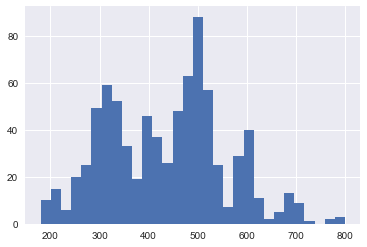

In [51]:
plt.show()

## Pokemon probability to Total

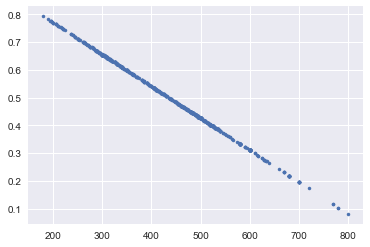

In [52]:
PokemonTotals = []
PokemonProbability =[]
for pokemons in range(1,len(pd_comp)):
    
    PokemonTotals.append( pd_comp[pokemons][3])
    PokemonProbability.append(rarity(pokemons))


plt.plot(PokemonTotals,PokemonProbability, marker='.',linestyle='None')



plt.show()

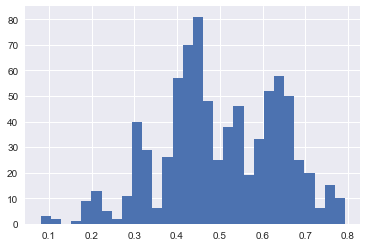

In [53]:

plt.hist (PokemonProbability,bins=30)

plt.show()